In [1]:
import pandas as pd

# Load the dataset
file_path = 'heart_disease.xlsx'  # Update with your file path if needed
heart_data = pd.ExcelFile(file_path)

In [3]:
# Load the sheet into a DataFrame
heart_df = heart_data.parse('Heart_disease')

In [7]:
# Display the first few rows
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
# Exploratory Data Analysis (EDA)

In [9]:
# Check for missing values
heart_df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [11]:
# Basic statistics
heart_df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [13]:
# Visualize distributions
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

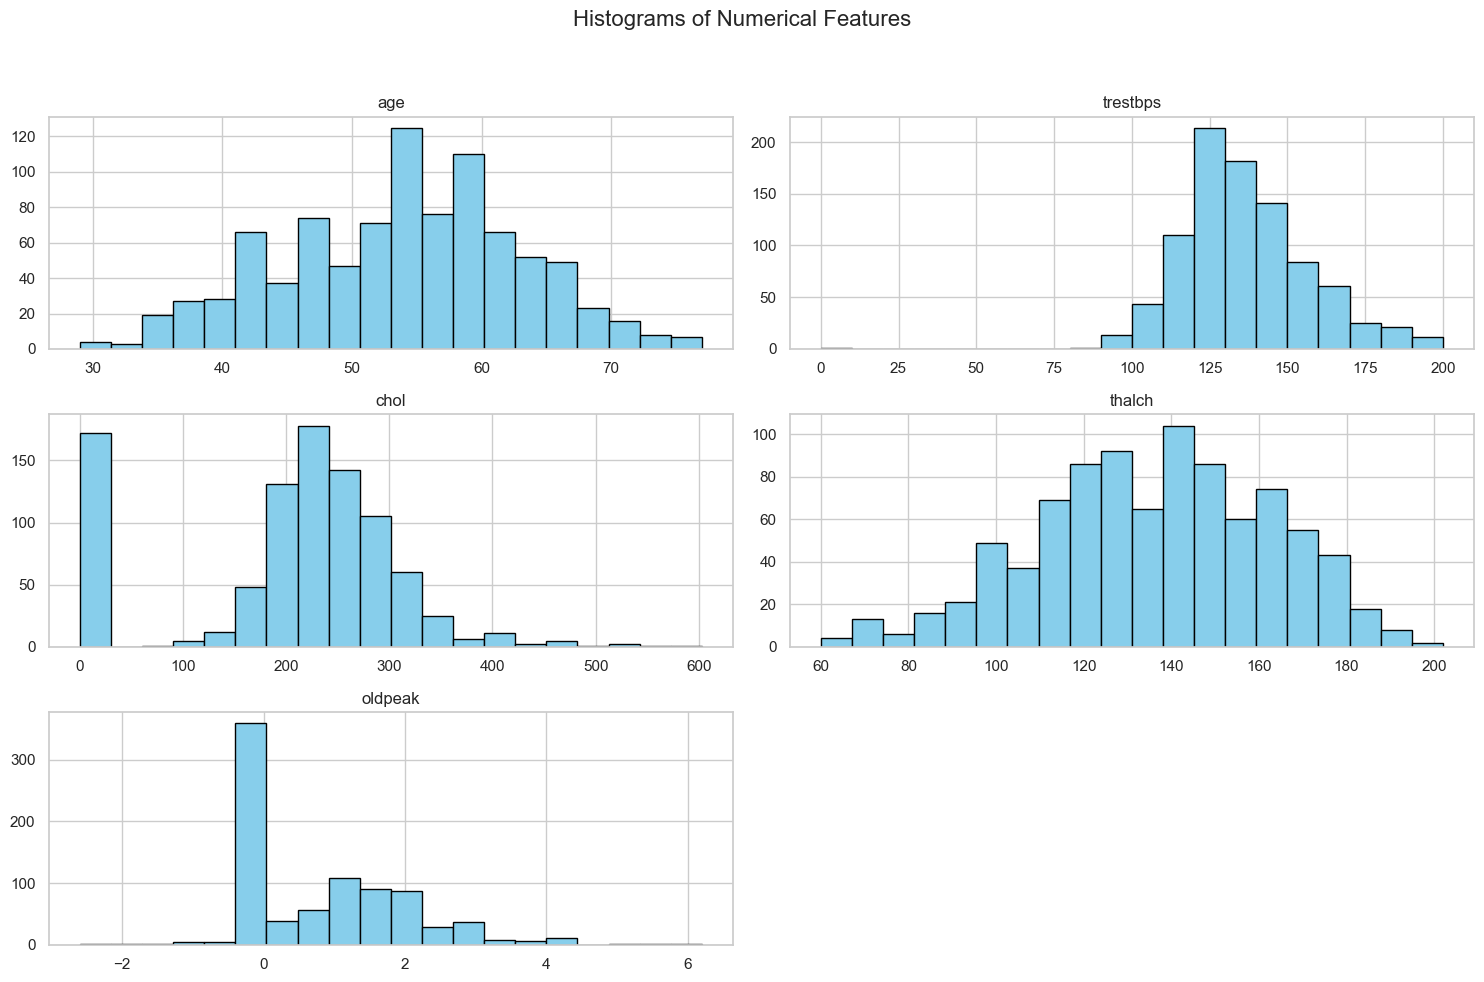

In [15]:
# Plot histograms
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
heart_df[numerical_columns].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

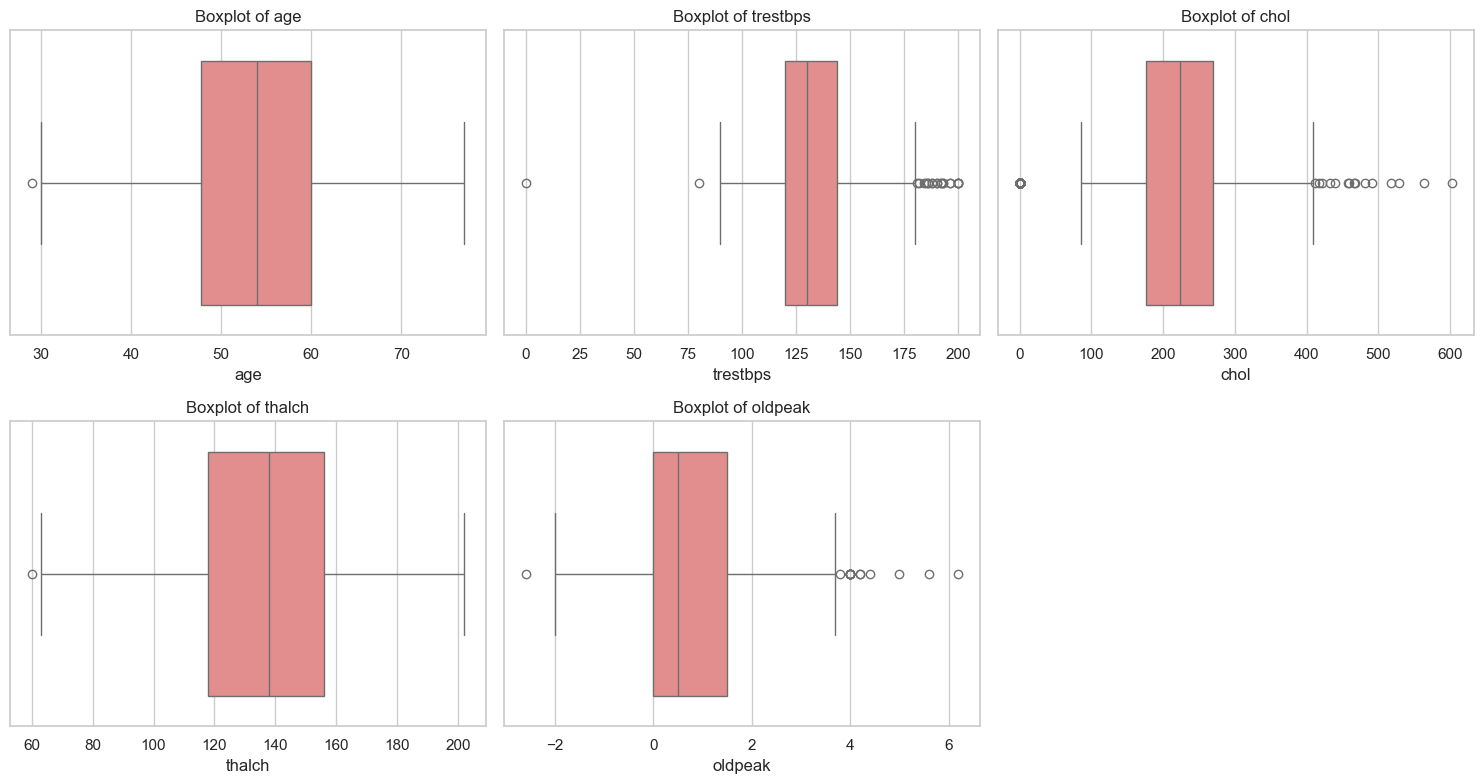

In [17]:
# Boxplots for outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=heart_df, x=col, color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [75]:
heart_df[numerical_columns].corr()

,age,trestbps,chol,thalch,oldpeak
age,1.000000,0.261161,0.002523,-0.328088,0.217942
trestbps,0.261161,1.000000,0.115433,-0.131508,0.142559
chol,0.002523,0.115433,1.000000,0.016429,0.011600
thalch,-0.328088,-0.131508,0.016429,1.000000,-0.112624
oldpeak,0.217942,0.142559,0.011600,-0.112624,1.000000


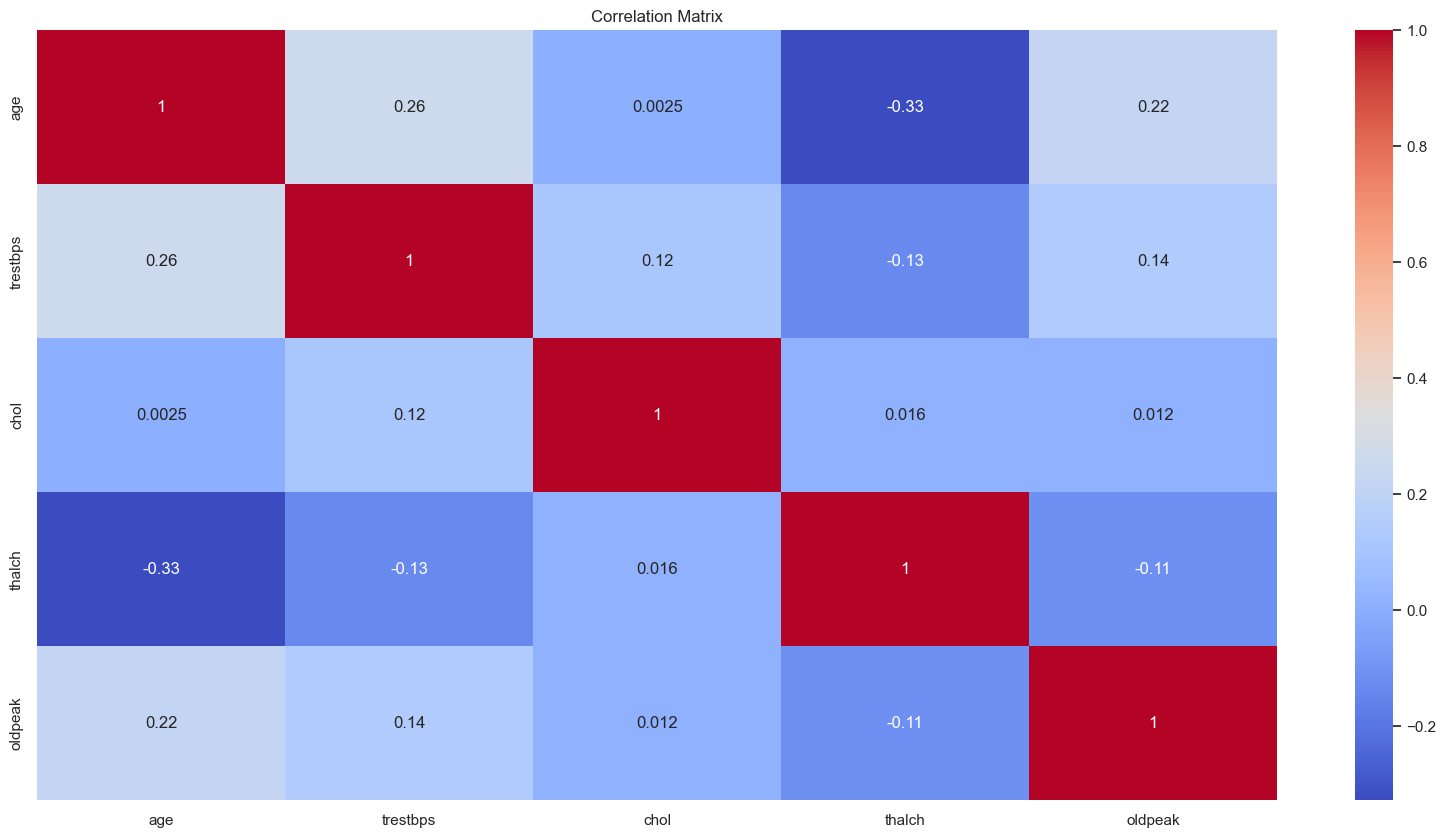

In [77]:
# Correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(heart_df[numerical_columns].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Handle Missing Values and Data Preparation

In [21]:
# Fill missing values for 'oldpeak' with the median
heart_df['oldpeak'].fillna(heart_df['oldpeak'].median(), inplace=True)

C:\Users\KRISHNA\AppData\Local\Temp\ipykernel_12708\21067609.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_df['oldpeak'].fillna(heart_df['oldpeak'].median(), inplace=True)


In [23]:
# Handle invalid values (e.g., zeros in 'trestbps' and 'chol')
heart_df['trestbps'] = heart_df['trestbps'].replace(0, heart_df['trestbps'].median())
heart_df['chol'] = heart_df['chol'].replace(0, heart_df['chol'].median())

In [27]:
# Check the target variable distribution
heart_df['num'].value_counts()

num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [ ]:
# Feature Encoding and Scaling

In [31]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
label_encoder = LabelEncoder()
heart_df['sex'] = label_encoder.fit_transform(heart_df['sex'])
heart_df['cp'] = label_encoder.fit_transform(heart_df['cp'])
heart_df['restecg'] = label_encoder.fit_transform(heart_df['restecg'])
heart_df['slope'] = label_encoder.fit_transform(heart_df['slope'])
heart_df['thal'] = label_encoder.fit_transform(heart_df['thal'])
heart_df['fbs'] = heart_df['fbs'].astype(int)  # Convert boolean to int
#heart_df['exang'] = heart_df['exang'].astype(int)

In [33]:
# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
heart_df[numerical_columns] = scaler.fit_transform(heart_df[numerical_columns])


In [45]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1.006027,1,3,0.574079,-0.194263,1,0,0.524183,False,1.354403,0,0
1,-1.397560,1,1,0.071656,-0.728134,0,1,-0.147705,False,-0.815718,1,0
2,0.350503,1,0,0.322867,-0.923887,0,1,0.449529,False,-0.438305,1,0
3,-0.195767,1,3,-0.782462,-1.030661,0,0,2.017268,False,-0.815718,1,0
4,0.350503,1,0,-1.184400,-0.763726,0,1,-0.371668,True,0.599578,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,1,0,-0.430766,-0.354425,0,1,-0.595631,False,0.599578,2,0
904,0.896773,1,0,1.629166,-1.315393,0,2,-0.595631,True,2.014874,1,2
905,0.241249,1,2,1.830135,-0.354425,0,0,-0.483649,True,1.543109,0,1
906,0.241249,1,2,0.523836,-0.639156,1,2,-1.155538,TURE,-0.343952,0,1


In [49]:
from sklearn.model_selection import train_test_split

# Define features and target
X = heart_df.drop('exang', axis=1)
y = heart_df['num']

In [51]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Decision Tree Classification

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
# Evaluate the model
y_pred = dt_model.predict(X_test)
classification_report(y_test, y_pred)
confusion_matrix(y_test, y_pred)

array([[89,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0],
       [ 0,  0, 22,  0,  0],
       [ 0,  0,  0, 17,  0],
       [ 0,  0,  0,  0,  6]], dtype=int64)

In [59]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [61]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [63]:
# Best parameters and evaluation
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
classification_report(y_test, y_pred_best)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        89\n           1       1.00      1.00      1.00        48\n           2       1.00      1.00      1.00        22\n           3       1.00      1.00      1.00        17\n           4       1.00      1.00      1.00         6\n\n    accuracy                           1.00       182\n   macro avg       1.00      1.00      1.00       182\nweighted avg       1.00      1.00      1.00       182\n'

In [ ]:
# Visualize the Decision Tree

In [67]:
# Check the unique values in the target variable
print("Unique target values:", y.unique())

Unique target values: [0 1 2 3 4]


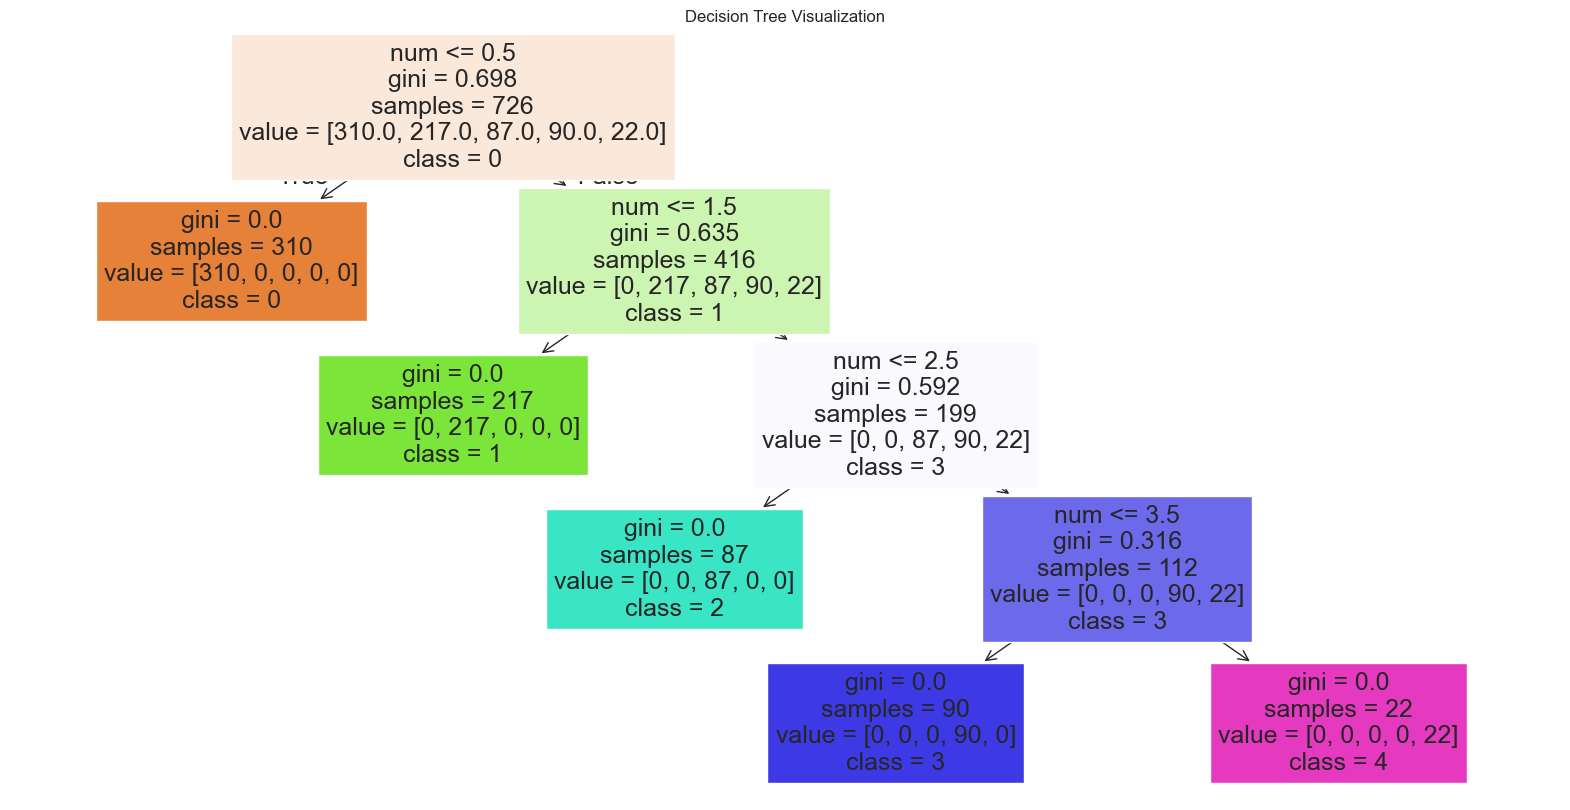

In [69]:
# Update the plot_tree visualization
plt.figure(figsize=(20, 10))
plot_tree(
    best_model, 
    feature_names=X.columns, 
    class_names=[str(cls) for cls in sorted(y.unique())],  # Use unique classes
    filled=True
)
plt.title('Decision Tree Visualization')
plt.show()
